<a href="https://colab.research.google.com/github/BrunoAzambuja/Covid_19_panorama_do_mundo_e_Brasil/blob/main/Covid_19_panorama_do_mundo_e_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19: Panorama do mundo e Brasil
#### Uma análise dos dados mantidos pela organização [Our World in Data](https://ourworldindata.org/coronavirus).

*by [Bruno Azambuja](www.brunoazambuja.com)*


<center><img alt="Colaboratory logo" width="110%" src="https://www.paho.org/sites/default/files/2022-08/covid-19-1300x650.jpg"></center>

O coronavírus (COVID-19) é uma doença infecciosa causada pelo vírus SARS-CoV-2, transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas. A gravidade dos sintomas varia muito de pessoa para pessoa.

O SARS-CoV-2 foi identificado pela primeira vez em seres humanos em dezembro de 2019 na cidade de Wuhan, na China, pensa-se que o SARS-CoV-2 seja de origem animal. Em março de 2020, a Organização Mundial da Saúde [WHO](https://www.who.int/director-general/speeches/detail/who-director-general-s-opening-remarks-at-the-media-briefing-on-covid-19---11-march-2020) declarou este surto uma pandemia mundial.

A pandemia COVID-19 se tornou sem precedentes, mas a resposta global se baseia nas lições aprendidas com outros surtos de doenças nas últimas décadas. Como parte da resposta da WHO, ativou o grupo de trabalho chamado [R&D Blueprint](https://www.who.int/teams/blueprint/covid-19) para acelerar diagnósticos, vacinas e terapias para este novo coronavírus.

Foram reunidos cientistas e profissionais globais de saúde do mundo todo para acelerar o processo de pesquisa e desenvolvimento de novas normas e padrões para conter a disseminação da pandemia do coronavírus e ajudar a cuidar dos afetados.

A solidariedade de todos os países seria essencial para garantir o acesso equitativo aos produtos de saúde COVID-19.

Fonte: [World Health Organization](https://www.who.int/emergencies/diseases/novel-coronavirus-2019)

## Premissas estabelecidas para o projeto

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, foi realizada uma análise nos dados públicos mantidos pela organização [Our World in Data](https://ourworldindata.org/coronavirus).

## Obtenção dos Dados

O Our World in Data serviu como fonte dos dados para o desenvolvimento da pesquisa e estudo do panorama geral do Brasil. Foi baixado o conjunto de dados de métricas completas COVID-19 oficial no repositório oficial [Github](https://github.com/owid/covid-19-data/tree/master/public/data), que tem acesso aberto ao público que tem interesse em utilizá-lo.

A organização Our World in Data é produzida como um esforço voluntário entre os pesquisadores da Universidade de Oxford, que são colaboradores científicos do conteúdo do site, e a organização sem fins lucrativos [Global Change Data Lab](https://global-change-data-lab.org/), que mantém o site público com suas ferramentas de dados.

Na Universidade de Oxford, a equipe de pesquisa é afiliada ao [Oxford Martin Programme on Global Development](https://www.oxfordmartin.ox.ac.uk/global-development/), onde a missão é produzir pesquisas acadêmicas sobre os maiores problemas do mundo com base na análise empírica de dados globais.

O Global Change Data Lab é uma organização sem fins lucrativos e são financiados por meio de doações de subsídios e leitores. Você pode aprender mais sobre o financiamento na página [Como somos financiados](https://ourworldindata.org/funding), e você pode ajudar a fazer mais doando [aqui](https://ourworldindata.org/donate). Isso fará a diferença.


**Dicionário das variáveis**
* *Esta etapa tem por objetivo criar uma consciência inicial e permitir um entendimento de como os dados estão estruturados.*
    * `iso_code` -  códigos dos países de três letras
    * `continent` - continente da localização geográfica
    * `location` - localização geográfica
    * `date` - data de observação
    * `population` - população, últimos valores disponíveis
    * `population_density` - número de pessoas divididas por área terrestre (medida em quilômetros quadrados)
    * `median_age` - idade mediana da população, projeção da ONU para 2020
    * `aged_65_older` - parcela da população com 65 anos ou mais (ano mais recente disponível)
    * `aged_70_older` - parcela da população com 70 anos ou mais em 2015
    * `gdp_per_capita` - produto interno bruto na paridade do poder aquisitivo (dólares internacionais constantes de 2011)
    * `extreme_poverty` - parcela da população vivendo em extrema pobreza, ano mais recente disponível desde 2010
    * `cardiovasc_death_rate` - taxa de mortalidade por doenças cardiovasculares (número anual de óbitos por 100.000 pessoas)
    * `diabetes_prevalence` - prevalência de diabetes (% da população de 20 a 79 anos em 2017)
    * `female_smokers` - parcela das mulheres que fumam, ano mais recente disponível
    * `male_smokers` - parcela dos homens que fumam, ano mais recente disponível
    * `handwashing_facilities` - parcela da população com instalações básicas de lavagem de mãos no local
    * `hospital_beds_per_thousand` - leitos hospitalares por 1.000 pessoas, ano mais recente disponível desde 2010

## Análise Exploratória dos Dados

O objetivo principal desta análise exploratória dos dados foi ajudar a analisar os dados antes de fazer qualquer suposição. Este processo ajuda na identificação de erros óbvios, a entender melhor os padrões presentes dos dados, detectar desvios ou eventos anômalos, além de encontrar relações interessantes entre as variáveis.

### **Instalando e importando pacotes**

In [1]:
# instalando
!pip install --upgrade geopandas
!pip install mapclassify
!pip install bar_chart_race -q
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.3 MB/s 
     |████████████████████████████████| 6.3 MB 37.5 MB/s 
     |████████████████████████████████| 16.7 MB 377 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 156 kB 5.1 MB/s 


In [2]:
# importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import bar_chart_race as bcr
import datetime
import numpy as np
import plotly.express as px
import geopandas as gpd
import fiona
import json
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer

Lendo os dados gerados pela organização Our World in Data.

In [3]:
# importando o dataset COVID-19 para um DataaFrame
df = pd.read_csv('/content/owid-covid-data.csv')

### **Verificando as características e tratando o dataframe**

Antes de iniciar qualquer análise, vamos verificar a cara do nosso dataframe, analisando as primeiras e últimas entradas.

Esta etapa consiste em um overview dos dados brutos que busca identificar necessidades de tratamento.

In [4]:
df

iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   
...         ...       ...          ...         ...          ...        ...   
219862      ZWE    Africa     Zimbabwe  2022-09-24     257318.0       29.0   
219863      ZWE    Africa     Zimbabwe  2022-09-25     257340.0       22.0   
219864      ZWE    Africa     Zimbabwe  2022-09-26     257342.0        2.0   
219865      ZWE    Africa     Zimbabwe  2022-09-27     257376.0       34.0   
219866      ZWE    Africa     Zimbabwe  2022-09-28     257409.0       33.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         NaN                  NaN   
1                      NaN           NaN         NaN                  NaN   
2                      NaN           NaN         NaN                  NaN   
3                      NaN           NaN         NaN                  NaN   
4                      NaN           NaN         NaN                  NaN   
...                    ...           ...         ...                  ...   
219862              47.143        5599.0         0.0                0.143   
219863              49.143        5599.0         0.0                0.143   
219864              36.000        5599.0         0.0                0.143   
219865              31.429        5599.0         0.0                0.143   
219866              36.143        5602.0         3.0                0.571   

        ...  female_smokers  male_smokers  handwashing_facilities  \
0       ...             NaN           NaN                  37.746   
1       ...             NaN           NaN                  37.746   
2       ...             NaN           NaN                  37.746   
3       ...             NaN           NaN                  37.746   
4       ...             NaN           NaN                  37.746   
...     ...             ...           ...                     ...   
219862  ...             1.6          30.7                  36.791   
219863  ...             1.6          30.7                  36.791   
219864  ...             1.6          30.7                  36.791   
219865  ...             1.6          30.7                  36.791   
219866  ...             1.6          30.7                  36.791   

        hospital_beds_per_thousand  life_expectancy  human_development_index  \
0                              0.5            64.83                    0.511   
1                              0.5            64.83                    0.511   
2                              0.5            64.83                    0.511   
3                              0.5            64.83                    0.511   
4                              0.5            64.83                    0.511   
...                            ...              ...                      ...   
219862                         1.7            61.49                    0.571   
219863                         1.7            61.49                    0.571   
219864                         1.7            61.49                    0.571   
219865                         1.7            61.49                    0.571   
219866                         1.7            61.49                    0.571   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                        NaN                          NaN   
1                                        NaN                          NaN   
2                                        NaN                          NaN   
3                                        NaN   


Com esses simples códigos já podemos visualizar algumas das variáveis da base que iremos usar. Como se pode visualizar acima, a sua estrutura está dividida em dias.

In [5]:
# identificando o volume de dados do DataFrame
print("Entradas/Linhas do dataframe:\t {}".format(df.shape[0]))
print("Variáveis/Colunas do dataframe:\t {}\n".format(df.shape[1]))

# verificando as entradas do dataset
df.dtypes

Entradas/Linhas do dataframe:	 219867
Variáveis/Colunas do dataframe:	 67



iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
human_development_index                    float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

Como vimos ao analisar o tipo das variáveis, verificamos que a coluna date não está em formato datetime. Para que possamos explorar essa variável ao máximo, vamos transformá-la para o formato datetime.

In [6]:
# transformando a coluna data em datetime
df.date = pd.to_datetime(df.date)

Por conta do elevado número de colunas que não estão alinhadas com o objetivo proposto nas premissas iniciais, serão excluídas algumas das colunas do dataset.

In [7]:
# verificando a lista de colunas
print(df.columns.tolist())

['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_

In [8]:
# excluindo as colunas com os dados faltantes e não relevante
df.drop(columns=['new_cases_smoothed', 'new_deaths_smoothed', 'new_cases_smoothed_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative', 'excess_mortality', 'excess_mortality_cumulative_per_million','hospital_beds_per_thousand',	'life_expectancy', 'human_development_index'], inplace=True)

Outro detalhe importante é a verificação em relação aos dados ausentes. Lembrando que buscamos não só quais dados estão faltando, mas também o motivo deles estarem faltando.

Para isso, verificamos a fonte dos dados, entendemos a coleta deles, verificamos a aleatoriedade dessa ausência, etc.

In [9]:
# verificando as variáveis com valores ausentes e ordenando em ordem decrescente
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False).head()

new_tests_per_thousand      0.657052
new_tests                   0.657052
total_tests_per_thousand    0.638932
handwashing_facilities      0.597065
tests_units                 0.514306
dtype: float64

Aqui foram preenchidos os valores ausentes das colunas com valor 0. 

In [10]:
# preenchendo os valores ausentes das colunas com 0
df.fillna(0, inplace=True)

Após o preenchimento, importante verificar se há mais algum valor ausente no dataset.

In [11]:
# verificando as variáveis com valores ausentes e ordenando em ordem decrescente
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False).head()

iso_code               0.0
tests_units            0.0
male_smokers           0.0
female_smokers         0.0
diabetes_prevalence    0.0
dtype: float64

Após o preenchimento foram eliminadas as linhas que contêm dados desnecessários, como informações de continentes e do mundo, que estão definidas com valor continente igual à 0.

In [12]:
# eliminando linhas desnecessárias
df.drop(df[df.continent == 0].index, axis=0, inplace=True)

Com os dados tratados, foi verificada novamente a cara do nosso dataset, analisando as primeiras e últimas entradas.

In [13]:
# verificando o dataset
df

iso_code continent     location       date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   
...         ...       ...          ...        ...          ...        ...   
219862      ZWE    Africa     Zimbabwe 2022-09-24     257318.0       29.0   
219863      ZWE    Africa     Zimbabwe 2022-09-25     257340.0       22.0   
219864      ZWE    Africa     Zimbabwe 2022-09-26     257342.0        2.0   
219865      ZWE    Africa     Zimbabwe 2022-09-27     257376.0       34.0   
219866      ZWE    Africa     Zimbabwe 2022-09-28     257409.0       33.0   

        total_deaths  new_deaths  total_cases_per_million  \
0                0.0         0.0                    0.125   
1                0.0         0.0                    0.125   
2                0.0         0.0                    0.125   
3                0.0         0.0                    0.125   
4                0.0         0.0                    0.125   
...              ...         ...                      ...   
219862        5599.0         0.0                16088.887   
219863        5599.0         0.0                16090.263   
219864        5599.0         0.0                16090.388   
219865        5599.0         0.0                16092.513   
219866        5602.0         3.0                16094.577   

        new_cases_per_million  ...  median_age  aged_65_older  aged_70_older  \
0                       0.125  ...        18.6          2.581          1.337   
1                       0.000  ...        18.6          2.581          1.337   
2                       0.000  ...        18.6          2.581          1.337   
3                       0.000  ...        18.6          2.581          1.337   
4                       0.000  ...        18.6          2.581          1.337   
...                       ...  ...         ...            ...            ...   
219862                  1.813  ...        19.6          2.822          1.882   
219863                  1.376  ...        19.6          2.822          1.882   
219864                  0.125  ...        19.6          2.822          1.882   
219865                  2.126  ...        19.6          2.822          1.882   
219866                  2.063  ...        19.6          2.822          1.882   

        gdp_per_capita  extreme_poverty cardiovasc_death_rate  \
0             1803.987              0.0               597.029   
1             1803.987              0.0               597.029   
2             1803.987              0.0               597.029   
3             1803.987              0.0               597.029   
4             1803.987              0.0               597.029   
...                ...              ...                   ...   
219862        1899.775             21.4               307.846   
219863        1899.775             21.4               307.846   
219864        1899.775             21.4               307.846   
219865        1899.775             21.4               307.846   
219866        1899.775             21.4               307.846   

        diabetes_prevalence  female_smokers  male_smokers  \
0                      9.59             0.0           0.0   
1                      9.59             0.0           0.0   
2                      9.59             0.0           0.0   
3                      9.59             0.0           0.0   
4                      9.59             0.0           0.0   
...                     ...             ...           ...   
219862                 1.82             1.6          30.7   
219863                 1.82             1.6          30.7   
219864                 1.82             1.6          30.7 

### **Número de mortes, quais países apresentam maior número**

Agora com os dados brutos tratados vamos iniciar a análise para que possamos tirar insights conforme as premissas estabelecidas.

Primeiramente vamos verificar qual a data mais recente do nosso dataframe. Com essa informação vamos verificar o país que apresenta o maior número de mortes acumulado.

In [14]:
# verificando a data mais recente do dataset
max = df.date.max()
max

Timestamp('2022-09-28 00:00:00')

In [15]:
# total de mortes
df.loc[df.date == '2022-09-28'].sort_values(by="total_deaths", ascending=False).head()

iso_code      continent       location       date  total_cases  \
208233      USA  North America  United States 2022-09-28   96263778.0   
28252       BRA  South America         Brazil 2022-09-28   34654190.0   
91272       IND           Asia          India 2022-09-28   44583360.0   
164200      RUS         Europe         Russia 2022-09-28   20609684.0   
128054      MEX  North America         Mexico 2022-09-28    7082034.0   

        new_cases  total_deaths  new_deaths  total_cases_per_million  \
208233    86496.0     1058595.0      1260.0               285651.207   
28252     15902.0      685927.0        92.0               161688.988   
91272      4272.0      528611.0        27.0                31674.130   
164200    39730.0      379227.0       107.0               142035.098   
128054        0.0      330046.0         0.0                55893.819   

        new_cases_per_million  ...  median_age  aged_65_older  aged_70_older  \
208233                256.666  ...        38.3         15.413          9.732   
28252                  74.195  ...        33.5          8.552          5.060   
91272                   3.035  ...        28.2          5.989          3.414   
164200                273.806  ...        39.6         14.178          9.393   
128054                  0.000  ...        29.3          6.857          4.321   

        gdp_per_capita  extreme_poverty cardiovasc_death_rate  \
208233       54225.446              1.2               151.089   
28252        14103.452              3.4               177.961   
91272         6426.674             21.2               282.280   
164200       24765.954              0.1               431.297   
128054       17336.469              2.5               152.783   

        diabetes_prevalence  female_smokers  male_smokers  \
208233                10.79            19.1          24.6   
28252                  8.11            10.1          17.9   
91272                 10.39             1.9          20.6   
164200                 6.18            23.4          58.3   
128054                13.06             6.9          21.4   

        handwashing_facilities  
208233                   0.000  
28252                    0.000  
91272                   59.550  
164200                   0.000  
128054                  87.847  

[5 rows x 29 columns]

Em relação às mortes, os países que apresentavam maior número em 28 de Setembro de 2022 eram:

- Estados Unidos: 1.058.595 mortes;
- Brasil: 685.927 mortes;
- Índia: 528.611 mortes;
- Rússia: 379.227 mortes;
- México: 330.046 mortes.

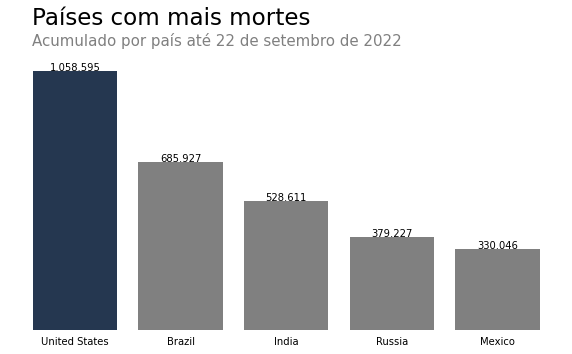

In [17]:
# selecionando os países
top_5_total_deaths = df.loc[df.date == '2022-09-28', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[:5]

# gerando o gráfico
fig, ax = plt.subplots(figsize=(10,5))
ax.bar('location', 'total_deaths', data=top_5_total_deaths, color=["#253750", "gray","gray","gray","gray"])
plt.title("Países com mais mortes", fontsize=23, x=0.045, y=1.1, loc="left")
plt.suptitle("Acumulado por país até 22 de setembro de 2022", color = "gray", fontsize=15, x=0.16, y=0.95, ha="left")
ax.ticklabel_format(style='plain', axis='y')

# definindo visibilidade de parâmetros
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True) 
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False) 
for pos in ['right', 'top', 'left', 'bottom']: 
    plt.gca().spines[pos].set_visible(False)

#colocando os rótulos
for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height(),
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'), # adicionando o texto da altura
          ha = 'center')

# gerando figura
plt.savefig('gráfico1.png', format='png')

#plotado gráfico
plt.show()

### **Número de mortes por habitantes, quais países apresentam maior número**

Outra análise importante a ser feita é o comparativo de mortes por habitantes de cada país no mundo, já que existe uma grande variabilidade de número de habitantes entre eles.
Para esta visualização, o dataframe nos fornece os dados chamado de `total_deaths_per_million`.

In [18]:
# excluindo as colunas para facilitar visualização do datafrem
df.drop(columns=['new_cases_per_million'], inplace=True)

In [19]:
# total de casos
df.loc[df.date == '2022-09-28'].sort_values(by='total_deaths_per_million', ascending=False).head(5)

iso_code      continent                location       date  \
157204      PER  South America                    Peru 2022-09-28   
31036       BGR         Europe                Bulgaria 2022-09-28   
26393       BIH         Europe  Bosnia and Herzegovina 2022-09-28   
89355       HUN         Europe                 Hungary 2022-09-28   
147386      MKD         Europe         North Macedonia 2022-09-28   

        total_cases  new_cases  total_deaths  new_deaths  \
157204    4142104.0        0.0      216526.0         0.0   
31036     1257918.0      769.0       37711.0         3.0   
26393      398574.0       68.0       16135.0         4.0   
89355     2094142.0    11392.0       47503.0        46.0   
147386     342775.0       79.0        9535.0         4.0   

        total_cases_per_million  total_deaths_per_million  ...  median_age  \
157204               122854.694                  6422.155  ...        29.1   
31036                182681.109                  5476.579  ...        44.7   
26393                121852.934                  4932.828  ...        42.5   
89355                215673.342                  4892.281  ...        43.4   
147386               162967.770                  4533.288  ...        39.1   

        aged_65_older  aged_70_older  gdp_per_capita extreme_poverty  \
157204          7.151          4.455       12236.706             3.5   
31036          20.801         13.272       18563.307             1.5   
26393          16.569         10.711       11713.895             0.2   
89355          18.577         11.976       26777.561             0.5   
147386         13.260          8.160       13111.214             5.0   

        cardiovasc_death_rate  diabetes_prevalence  female_smokers  \
157204                 85.755                 5.95             4.8   
31036                 424.688                 5.81            30.1   
26393                 329.635                10.08            30.2   
89355                 278.296                 7.55            26.8   
147386                322.688                10.08             0.0   

        male_smokers  handwashing_facilities  
157204           0.0                   0.000  
31036           44.4                   0.000  
26393           47.7                  97.164  
89355           34.8                   0.000  
147386           0.0                   0.000  

[5 rows x 28 columns]

Fazendo esta nova análise podemos observar uma mudança significativa entre os 5 maiores, se comparados à da lista anterior:

- Peru: 6.422 de casos por milhão;
- Bulgária: 5.476 de casos por milhão;
- Bosnia e Harzegovina: 4.932 casos de por milhão;
- Hungria: 4.892 de casos por milhão;
- Norte da Macedônia: 4.533 de casos por milhão.

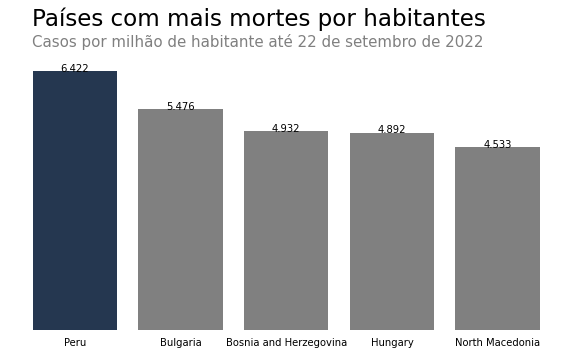

In [20]:
# selecionando os países
top_5_total_deaths_per_million = df.loc[df.date == '2022-09-28', ['location', 'total_deaths_per_million']].sort_values(by='total_deaths_per_million', ascending=False)[:5]

# gerando o gráfico
fig, ax = plt.subplots(figsize=(10,5))
ax.bar('location', 'total_deaths_per_million', data=top_5_total_deaths_per_million, color=["#253750", "gray","gray","gray","gray"])
plt.title("Países com mais mortes por habitantes", fontsize=23, x=0.045, y=1.1, loc="left")
plt.suptitle("Casos por milhão de habitante até 22 de setembro de 2022 ", color = "gray", fontsize=15, x=0.16, y=0.95, ha="left")
ax.ticklabel_format(style='plain', axis='y')

# definindo visibilidade de parâmetros
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True) 
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False) 
for pos in ['right', 'top', 'left', 'bottom']: 
    plt.gca().spines[pos].set_visible(False)

#colocando os rótulos
for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height(),
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'), # adicionando o texto da altura
          ha = 'center')
  
# gerando figura
plt.savefig('gráfico2.png', format='png')

#plotado gráfico
plt.show()

### **Bar Chart Race, a escalada de mortes dos países**

Um gráfico muito interessante e que tem ganhado cada vez mais espaço na mídia é o Bar Chart Race.
Basicamente, é um gráfico de barras animado, que representa a evolução dos números ao longo do tempo.

Para utilizar esse tipo de visualização precisamos de um conjunto de dados "grande" onde:

- Cada linha representa um período no tempo;
- Cada coluna contém valores para uma categoria;
- O index contém um elemento de tempo (opcional).

Primeiramente geramos um dataframe com a estrutura e as características necessárias para o Bar Chart race.

In [21]:
# gerando dataframe
df_race = df.pivot_table(index='date',columns='location',values='total_deaths').sort_index(ascending=True)
df_race.tail()

location    Afghanistan  Albania  Algeria  Andorra  Angola  Anguilla  \
date                                                                   
2022-09-24       7796.0   3589.0   6879.0    155.0  1917.0      12.0   
2022-09-25       7796.0   3589.0   6879.0    155.0  1917.0      12.0   
2022-09-26       7798.0   3589.0   6879.0    155.0  1917.0      12.0   
2022-09-27       7798.0   3589.0   6879.0    155.0  1917.0      12.0   
2022-09-28       7799.0   3589.0   6879.0    155.0  1917.0      12.0   

location    Antigua and Barbuda  Argentina  Armenia  Aruba  ...  Uzbekistan  \
date                                                        ...               
2022-09-24                145.0   129855.0   8679.0  228.0  ...      1637.0   
2022-09-25                145.0   129897.0   8679.0  228.0  ...      1637.0   
2022-09-26                146.0   129897.0   8683.0  228.0  ...      1637.0   
2022-09-27                146.0   129897.0   8683.0  228.0  ...      1637.0   
2022-09-28                146.0   129897.0   8683.0  230.0  ...      1637.0   

location    Vanuatu  Vatican  Venezuela  Vietnam  Wallis and Futuna  \
date                                                                  
2022-09-24     14.0      0.0     5814.0  43146.0                7.0   
2022-09-25     14.0      0.0     5814.0  43146.0                7.0   
2022-09-26     14.0      0.0     5814.0  43146.0                7.0   
2022-09-27     14.0      0.0     5814.0  43147.0                7.0   
2022-09-28     14.0      0.0     5814.0  43147.0                7.0   

location    Western Sahara   Yemen  Zambia  Zimbabwe  
date                                                  
2022-09-24             NaN  2157.0  4017.0    5599.0  
2022-09-25             NaN  2157.0  4017.0    5599.0  
2022-09-26             NaN  2157.0  4017.0    5599.0  
2022-09-27             NaN  2157.0  4017.0    5599.0  
2022-09-28             NaN  2157.0  4017.0    5602.0  

[5 rows x 231 columns]

Verificando a estrutura do dataframe pode-se observar que há necessidade de tratamento dos dados. Mas antes disso vamos identifcar os 10 países com maior número de mortes na data mais recente disponível. Tendo esta lista, iremos manter somente eles no dataframe e submetê-los ao Bar Chart Race.

In [22]:
# identificando os 10 países com maior número de mortes em 2022-09-28
df_race.loc['2022-09-28'].sort_values(ascending=False).head(10)

location
United States     1058595.0
Brazil             685927.0
India              528611.0
Russia             379227.0
Mexico             330046.0
Peru               216526.0
United Kingdom     206532.0
Italy              177024.0
Indonesia          158076.0
France             155114.0
Name: 2022-09-28 00:00:00, dtype: float64

Após a identificação destes países, verificamos quais países estão presentes no dataframe atual para que seja realizada a função drop dos países que não são necessários permanecer.

In [23]:
# verificando os países do dataset
print(df_race.columns.tolist())

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Faeroe Islands', 'Falkland Islands', 'Fiji', 'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia', 'Georgia'

In [24]:
# excluindo as colunas com os dados faltantes e não relevante
df_race.drop(columns=['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Faeroe Islands', 'Falkland Islands', 'Fiji', 'Finland', 'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guam', 'Guatemala', 'Guernsey', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'Iraq', 'Ireland', 'Isle of Man', 'Israel', 'Jamaica', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Mauritania', 'Mauritius', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Montserrat', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'New Caledonia', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Northern Mariana Islands', 'Norway', 'Oman', 'Pakistan', 'Palestine', 'Panama', 'Papua New Guinea', 'Paraguay', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Romania', 'Rwanda', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Sint Maarten (Dutch part)', 'Slovakia', 'Slovenia', 'Somalia', 'South Africa', 'South Korea', 'South Sudan', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'Switzerland', 'Syria', 'Taiwan', 'Tajikistan', 'Tanzania', 'Thailand', 'Timor', 'Togo', 'Trinidad and Tobago', 'Tunisia', 'Turks and Caicos Islands', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United States Virgin Islands', 'Uruguay', 'Uzbekistan', 'Vatican', 'Venezuela', 'Vietnam', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe','Canada', 'Netherlands', 'Sweden', 'Turkey', 'China', 'Ecuador', 'Chile', 'Belgium', 'Cook Islands', 'Czechia', 'Eswatini', 'Germany', 'Hong Kong', 'Iran', 'Kiribati', 'Macao', 'Marshall Islands', 'Micronesia (country)', 'Nauru', 'Niue', 'North Korea', 'North Macedonia', 'Northern Cyprus', 'Palau', 'Pitcairn', 'Saint Helena', 'Saint Pierre and Miquelon', 'Samoa', 'Solomon Islands', 'Tokelau', 'Tonga', 'Turkmenistan', 'Tuvalu', 'Vanuatu', 'Wallis and Futuna'], inplace=True)

Com estas limpezas agora vamos fazer uma série de verificações para certificar a conclusão do tratamento do dataframe conforme o objetivo proposto para o Bar Chart Race.

In [25]:
# verificando shape do df_race
df_race.shape

(1002, 10)

In [26]:
# verificando os países da lista
print(df_race.columns.tolist())

['Brazil', 'France', 'India', 'Indonesia', 'Italy', 'Mexico', 'Peru', 'Russia', 'United Kingdom', 'United States']


In [27]:
# verificando as variáveis com valores ausentes e ordenando em ordem decrescente
(df_race.isnull().sum() / df_race.shape[0]).sort_values(ascending=False).head()

location
Peru         0.064870
Indonesia    0.060878
Brazil       0.055888
Italy        0.029940
Russia       0.029940
dtype: float64

Conforme identificado na verificação, há a necessecidade de limpeza dos dados faltantes.

In [28]:
# eliminando as linhas desnecessárias
df_race.drop(df_race.index[:27], inplace=True)

# preenchendo os valores ausentes das colunas com 0
df_race.fillna(0, inplace=True)

In [29]:
# verificando o dataframe
df_race

location      Brazil    France     India  Indonesia     Italy    Mexico  \
date                                                                      
2020-01-28       0.0       0.0       0.0        0.0       0.0       0.0   
2020-01-29       0.0       0.0       0.0        0.0       0.0       0.0   
2020-01-30       0.0       0.0       0.0        0.0       0.0       0.0   
2020-01-31       0.0       0.0       0.0        0.0       0.0       0.0   
2020-02-01       0.0       0.0       0.0        0.0       0.0       0.0   
...              ...       ...       ...        ...       ...       ...   
2022-09-24  685750.0  154956.0  528510.0   157998.0  176867.0  330043.0   
2022-09-25  685750.0  154956.0  528530.0   158014.0  176880.0  330043.0   
2022-09-26  685835.0  155029.0  528562.0   158036.0  176912.0  330046.0   
2022-09-27  685835.0  155078.0  528584.0   158057.0  176976.0  330046.0   
2022-09-28  685927.0  155114.0  528611.0   158076.0  177024.0  330046.0   

location        Peru    Russia  United Kingdom  United States  
date                                                           
2020-01-28       0.0       0.0             0.0            0.0  
2020-01-29       0.0       0.0             0.0            0.0  
2020-01-30       0.0       0.0             1.0            0.0  
2020-01-31       0.0       0.0             1.0            0.0  
2020-02-01       0.0       0.0             1.0            0.0  
...              ...       ...             ...            ...  
2022-09-24  216473.0  378840.0        206652.0      1056547.0  
2022-09-25  216493.0  378935.0        206652.0      1056554.0  
2022-09-26  216514.0  379019.0        206652.0      1056905.0  
2022-09-27  216526.0  379120.0        206532.0      1057335.0  
2022-09-28  216526.0  379227.0        206532.0      1058595.0  

[975 rows x 10 columns]

Conforme pode ser visto, o dataframe está totalmente tratado, agora podendo ser utilizado no Bar Chart race.

In [ ]:
# criando o plot customizado
bcr.bar_chart_race(
    df=df_race, # selecionando os dados
    #filename='bar_chart_race.mp4', # nomeando o arquivo
    orientation='h', # orientação do gráfico
    sort='desc', # organização 
    n_bars=10, # número de barras
    fixed_order=False, # ordem fixa
    fixed_max=False, # máximo fixo
    steps_per_period=2, # steps por período
    period_length=100, # tempo por período
    interpolate_period=False, # interpolar o período
    label_bars=True, # colocar labels nas barras
    bar_size=.95, # tamanho da barra
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'}, # labels dos períodos
    period_fmt='%B %d, %Y', # formato do período
    dpi=144, 
    cmap='dark12', # esquema de cores
    title='COVID-19 Deaths by Country', # título
    title_size='', # tamamnho do título
    bar_label_size=7, # tamanho do label das barras
    tick_label_size=7, # tamanho do tick do label
    #shared_fontdict={'family' : 'Helvetica', 'color' : '.1'}, # definindo a fonte
    scale='linear', # escala dos dados
    writer=None, # escrever no plot
    fig=None, # definir a figura
    bar_kwargs={'alpha': .7}, # kwargs
    filter_column_colors=False)  # filtrar cores das colunas

Clique no link do `Open in Colab`, no canto superior esquerdo do notebook, para acessar o arquivo e visualizar o vídeo do gráfico na plataforma Google Colab.

O Bar Chart Race nos mostra o total de mortes por COVID-19 nos dez países que mais apresentaram mortes no mundo, do início da pandemia até o momento em que este estudo foi realizado.

### **Progressão de novas mortes no mundo, um breve resumo visual**

Ao longo da pandemia houve alguns momentos em que a progressão de casos se acentuou, gerando picos em função de fatores como as novas variantes.

Para auxílio da análise deste quadro, podemos gerar um resumo visual plotando um gráfico interativo de linhas que demonstra a progressão de novas mortes por COVID-19 no mundo.

In [30]:
# carregando os dados novamente
df = pd.read_csv('/content/owid-covid-data.csv')

# gerando o dataframe com as informações necessárias
df_loc = df.loc[df.location == "World", ["date","new_deaths"]]

# gerando figura
plt.savefig('gráfico3.png', format='png')

# gerando o gráfico interativo
fig = px.line(df_loc, x='date', y='new_deaths',title="COVID-19 New Deaths in World")
fig.show()

<Figure size 432x288 with 0 Axes>

Clique no link do `Open in Colab`, no canto superior esquerdo do notebook, para acessar o arquivo e visualizar o gráfico interativo na plataforma Google Colab.

Pelo gráfico pode-se observar que houveram alguns picos ao longo deste período, assim como uma redução de mortes nos últimos períodos do estudo.

### **Heat Map mundial, um panorama de mortes no mundo**

O objetivo proposto do Heat Map de mortes no mundo é gerar uma visualização do mapa mundi com os dados do dataframe, para que possamos ter um panorama geral entre os países do mundo.

Para gerar um mapa mundi, precisamos de um arquivo de formato com coordenadas mundiais. [Natural Earth](https://www.naturalearthdata.com/) é um conjunto de dados de mapa de domínio público que fornece dados geoespaciais em várias resoluções. Para nosso propósito, [dados de 1 a 110m em pequena escala](https://www.naturalearthdata.com/downloads/110m-cultural-vectors/) são bons o suficiente.

In [31]:
shapefile = '/content/ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
gdf.head()

country country_code  \
0                         Fiji          FJI   
1  United Republic of Tanzania          TZA   
2               Western Sahara          SAH   
3                       Canada          CAN   
4     United States of America          USA   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

Em seguida, foram verificadas as colunas com valores ausentes.

In [32]:
(gdf.isnull().sum() / gdf.shape[0]).sort_values(ascending=False).head()

country         0.0
country_code    0.0
geometry        0.0
dtype: float64

Podemos eliminar `Antarctica` pois ela ocupa desnecessariamente um grande espaço em nosso mapa e não é necessária em nossa análise atual.

In [33]:
# identificando o index
print(gdf[gdf['country'] == 'Antarctica'])

        country country_code  \
159  Antarctica          ATA   

                                              geometry  
159  MULTIPOLYGON (((-48.66062 -78.04702, -48.15140...  


In [34]:
# eliminando a linha correspondente
gdf = gdf.drop(gdf.index[159])

Agora foi gerado o dataframe que contém os dados necessários para adicionar no mapa, conforme as premissas estabelecidas.

In [35]:
# importando o dataset COVID-19 para um DataaFrame
df = pd.read_csv('/content/owid-covid-data.csv')

# transformando a coluna data em datetime
df.date = pd.to_datetime(df.date)

# excluindo as colunas com os dados faltantes e não relevante
df.drop(columns=['new_cases_smoothed', 'new_deaths_smoothed', 'new_cases_smoothed_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative', 'excess_mortality', 'excess_mortality_cumulative_per_million','hospital_beds_per_thousand',	'life_expectancy', 'human_development_index'], inplace=True)

# preenchendo os valores ausentes das colunas com 0
df.fillna(0, inplace=True)

# eliminando linhas desnecessárias
df.drop(df[df.continent == 0].index, axis=0, inplace=True)

# convertendo a data
df['date'] = df['date'].astype('int64')

# gerando dataframe
df_2022 = df.loc[df.date == 1664236800000000000, ['location', 'iso_code','date','total_deaths']].sort_values(by="total_deaths", ascending=False)#.set_index('location')
df_2022.head()

# warnings.filterwarnings('ignore')
# sns.set_style()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning:

casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



location iso_code                 date  total_deaths
208232  United States      USA  1664236800000000000     1057335.0
28251          Brazil      BRA  1664236800000000000      685835.0
91271           India      IND  1664236800000000000      528584.0
164199         Russia      RUS  1664236800000000000      379120.0
128053         Mexico      MEX  1664236800000000000      330046.0

Em seguida foram verificadas as colunas com valores ausentes.



In [36]:
# verificando colunas vazias
(df_2022.isnull().sum() / df_2022.shape[0]).sort_values(ascending=False).head()

location        0.0
iso_code        0.0
date            0.0
total_deaths    0.0
dtype: float64

In [37]:
# verificando os tipos das variáveis
print (df_2022.dtypes)

location         object
iso_code         object
date              int64
total_deaths    float64
dtype: object


Agora as linhas de dois dataFrames foram fundidas, para todos os casos que o nome de coluna aparecer em ambos os dataFrame, os sufixos serem anexados aos nomes das colunas e fazerem colunas diferentes após a fusão.

In [38]:
merged = gdf.merge(df_2022, left_on = 'country_code', right_on = 'iso_code')
merged

country country_code  \
0                           Fiji          FJI   
1    United Republic of Tanzania          TZA   
2                         Canada          CAN   
3       United States of America          USA   
4                     Kazakhstan          KAZ   
..                           ...          ...   
162       Bosnia and Herzegovina          BIH   
163              North Macedonia          MKD   
164           Republic of Serbia          SRB   
165                   Montenegro          MNE   
166          Trinidad and Tobago          TTO   

                                              geometry  \
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...   
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...   
2    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...   
3    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...   
4    POLYGON ((87.35997 49.21498, 86.59878 48.54918...   
..                                                 ...   
162  POLYGON ((18.56000 42.65000, 17.67492 43.02856...   
163  POLYGON ((22.38053 42.32026, 22.88137 41.99930...   
164  POLYGON ((18.82982 45.90887, 18.82984 45.90888...   
165  POLYGON ((20.07070 42.58863, 19.80161 42.50009...   
166  POLYGON ((-61.68000 10.76000, -61.10500 10.890...   

                   location iso_code                 date  total_deaths  
0                      Fiji      FJI  1664236800000000000         878.0  
1                  Tanzania      TZA  1664236800000000000         845.0  
2                    Canada      CAN  1664236800000000000       45263.0  
3             United States      USA  1664236800000000000     1057335.0  
4                Kazakhstan      KAZ  1664236800000000000       19049.0  
..                      ...      ...                  ...           ...  
162  Bosnia and Herzegovina      BIH  1664236800000000000       16131.0  
163         North Macedonia      MKD  1664236800000000000        9531.0  
164                  Serbia      SRB  1664236800000000000       16974.0  
165              Montenegro      MNE  1664236800000000000        2781.0  
166     Trinidad and Tobago      TTO  1664236800000000000        4195.0  

[167 rows x 7 columns]

O arquivo mesclado é um objeto GeoDataframe que pode ser renderizado usando o módulo geopandas. No entanto, como queremos incorporar a interatividade de visualização de dados, usaremos a biblioteca Bokeh. Bokeh consome o formato GeoJSON, que representa características geográficas com json. GeoJSON descreve pontos, linhas e polígonos (chamados Patches em Bokeh) como uma coleção de características. Por isso, convertemos o arquivo mesclado em formato GeoJSON.

In [39]:
# lendo os dados com json
merged_json = json.loads(merged.to_json())
# convertendo parao String como object
json_data = json.dumps(merged_json)

Agora estamos prontos para gerar o nosso mapa de choropleth usando Bokeh.

In [40]:
# inputando o GeoJSON
geosource = GeoJSONDataSource(geojson = json_data)
# definindo a sequência de cores do palette
palette = brewer['YlGnBu'][8]
# revertendo a ordem da cor
palette = palette[::-1]
# intanciando LinearColorMapper
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 500000)
# definindo os labels
tick_labels = {'0': '0', '1000':'1000', '5000':'5000','10000':'10000','50000':'50000', '100000':'100000','500000':'500000','1000000':'1000000'}
# criando a cor da barra 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 1100, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)
# criando a figura do objeto
p = figure(title = 'Share of adults who are obese, 2016', plot_height = 600 , plot_width = 1100, toolbar_location = None)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
# adicionando patch renderer para figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'total_deaths', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
# specificando o lyout da figura
p.add_layout(color_bar, 'below')
# mostrando a figura
output_notebook()
show(p)

<Figure size 432x288 with 0 Axes>

Clique no link do `Open in Colab`, no canto superior esquerdo do notebook, para acessar o arquivo e visualizar o mapa na plataforma Google Colab.

### **Gráfico interativo de renda per capita vs número total de mortos**

Com o objetivo de se fazer uma análise comparativa de renda per capita com o número total de mortes, foi gerado um gráfico de dispersão interativo. Os dados considerados foram da data mais recente disponível.

In [ ]:
# importando o dataset COVID-19 para um DataaFrame
df = pd.read_csv('/content/owid-covid-data.csv')

# transformando a coluna data em datetime
df.date = pd.to_datetime(df.date)

# excluindo as colunas com os dados faltantes e não relevante
df.drop(columns=['new_cases_smoothed', 'new_deaths_smoothed', 'new_cases_smoothed_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative', 'excess_mortality', 'excess_mortality_cumulative_per_million','hospital_beds_per_thousand',	'life_expectancy', 'human_development_index'], inplace=True)

# preenchendo os valores ausentes das colunas com 0
df.fillna(0, inplace=True)

# eliminando linhas desnecessárias
df.drop(df[df.continent == 0].index, axis=0, inplace=True)
df.drop(df[df.gdp_per_capita == 0].index, axis=0, inplace=True)

# gerando dataframe
df = df.loc[df.date == '2022-09-28', ['date', 'location', 'gdp_per_capita', 'total_deaths']].sort_values(by="total_deaths", ascending=False).set_index('date')

# plotando gráfico de dispersão
fig = px.scatter(df, x='gdp_per_capita', y='total_deaths', hover_data=['location'])
fig.show()

Clique no link do `Open in Colab`, no canto superior esquerdo do notebook, para acessar o arquivo e visualizar o gráfico interativo na plataforma Google Colab.

## Conclusão


Importante ser destacado que esses dados são medidos diariamente, e o conjunto de dados utilizado neste estudo ficará desatualizado na medida em que novos dados forem adicionados até a WHO decretar o fim da pandemia.

Entretanto, levando em consideração o contexto dos dados analisados, vale a pena destacar que:

* Os Estados Unidos estão disparados em relação aos casos e mortes;
* A evolução dos casos no Brasil cresceu rapidamente;
* Importante também considerar os casos de mortes por milhão entre os países;
* No geral, houve algumas acelerações/picos no número de mortes.

Muitas outras análises podem ser retiradas desse conjunto de dados, mas com essa análise inicial já conseguimos retirar muitas informações.